<a href="https://colab.research.google.com/github/asmaaitnasser/DDDM/blob/main/Modele_Prediction_Climat_Agriculture_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Prédiction de la production agricole à partir du climat

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


## 📥 Chargement des données

In [2]:

# Charger le dataset final préparé (fusion climat + production agricole)
df = pd.read_csv("/content/dataset_final_prediction_climat_agriculture.csv")


## ⚙️ Sélection des variables

In [3]:

features = [
    'température moyenne', 'température maximale', 'température minimale',
    'vitesse du vent', 'température du vent',
    'précipitations moyennes par jour', 'précipitations totales sur le mois',
    'humidité', 'visibilité', 'couverture nuageuse'
]
target = 'production_tonnes'

df_clean = df.dropna(subset=features + [target])
X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 🔹 Modèle 1 : SVR

SVR:
MAE: 22557.13024467648
RMSE: 26273.93381928442
R²: -0.03803226927482095


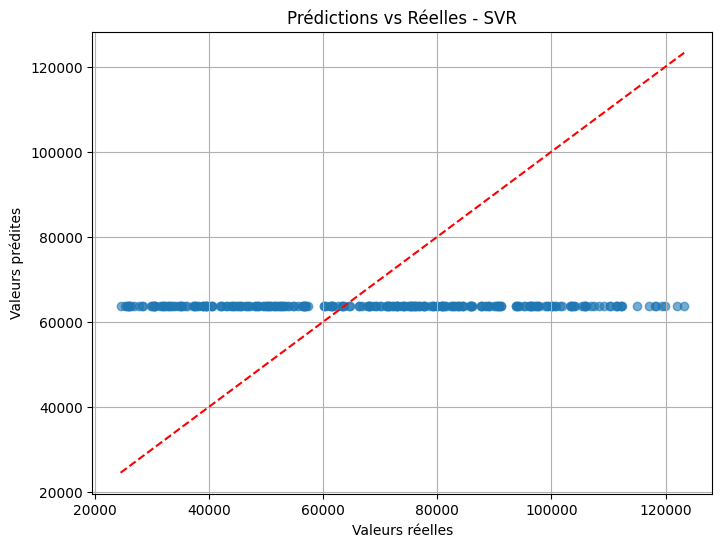

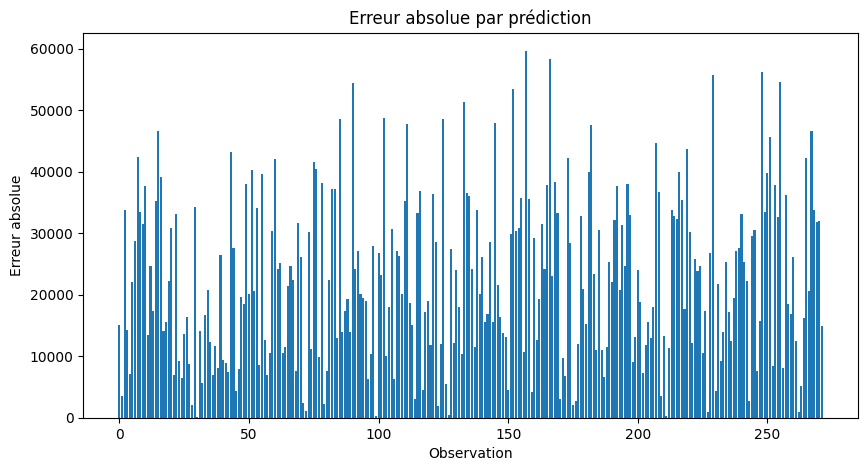

In [17]:

from sklearn.svm import SVR

model = SVR()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("SVR:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))
# Visualisation : Prédictions vs Réelles
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Prédictions vs Réelles - SVR")
plt.grid()
plt.show()
# Visualisation : Erreurs absolues
erreurs = abs(y_test - y_pred)
plt.figure(figsize=(10, 5))
plt.bar(range(len(erreurs)), erreurs)
plt.xlabel("Observation")
plt.ylabel("Erreur absolue")
plt.title("Erreur absolue par prédiction")
plt.show()




## 🔹 Modèle 2 : MLP Regressor

MLP Regressor:
MAE: 53889.50185287609
RMSE: 60217.162976232976
R²: -4.452569785115958


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


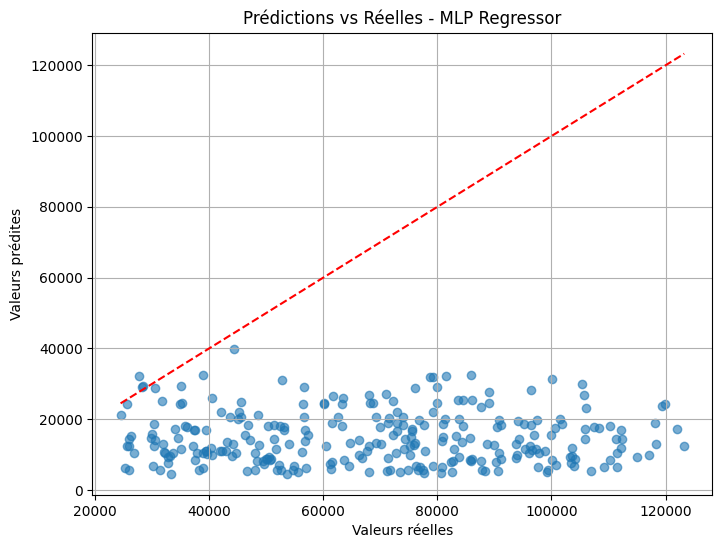

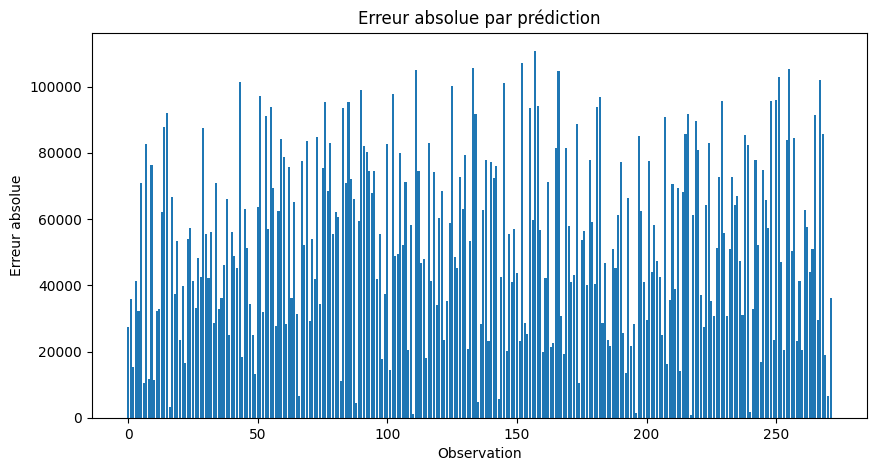

In [16]:

from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("MLP Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))
# Visualisation : Prédictions vs Réelles
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Prédictions vs Réelles - MLP Regressor")
plt.grid()
plt.show()
# Visualisation : Erreurs absolues
erreurs = abs(y_test - y_pred)
plt.figure(figsize=(10, 5))
plt.bar(range(len(erreurs)), erreurs)
plt.xlabel("Observation")
plt.ylabel("Erreur absolue")
plt.title("Erreur absolue par prédiction")
plt.show()




## 🔹 Modèle 3 : XGBoost

XGBoost:
MAE: 24968.865031594672
RMSE: 29884.489962517593
R²: -0.3429268208717049


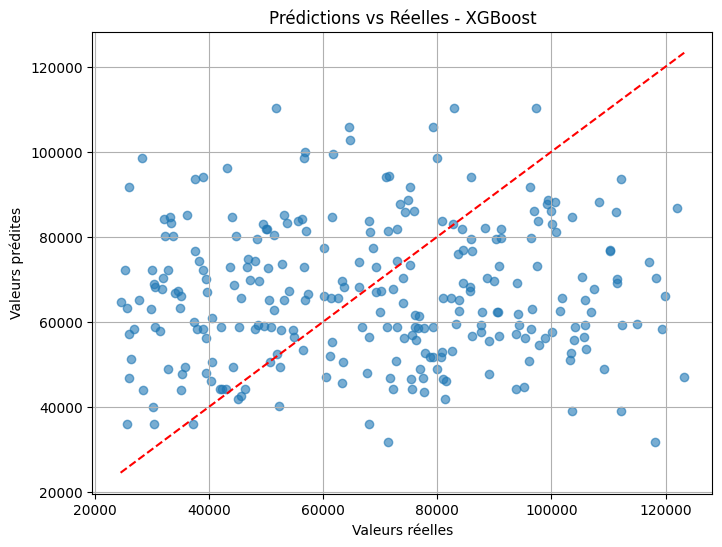

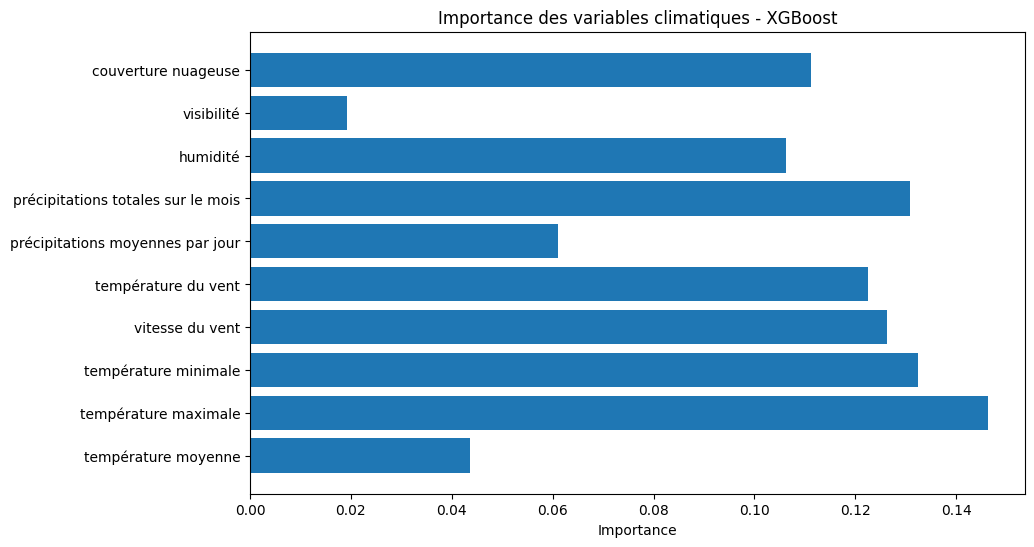

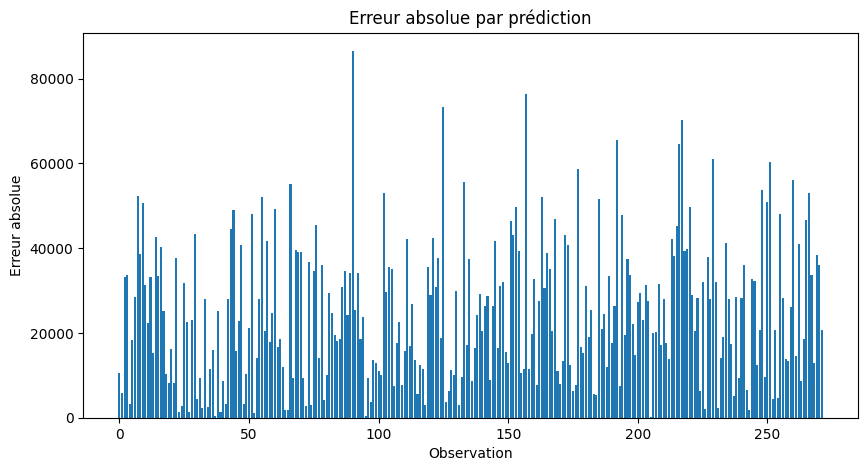

In [15]:

from xgboost import XGBRegressor

model = XGBRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("XGBoost:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))
# Visualisation : Prédictions vs Réelles
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Prédictions vs Réelles - XGBoost")
plt.grid()
plt.show()
# Importance des variables (XGBoost uniquement)
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Importance des variables climatiques - XGBoost")
plt.show()
# Visualisation : Erreurs absolues
erreurs = abs(y_test - y_pred)
plt.figure(figsize=(10, 5))
plt.bar(range(len(erreurs)), erreurs)
plt.xlabel("Observation")
plt.ylabel("Erreur absolue")
plt.title("Erreur absolue par prédiction")
plt.show()



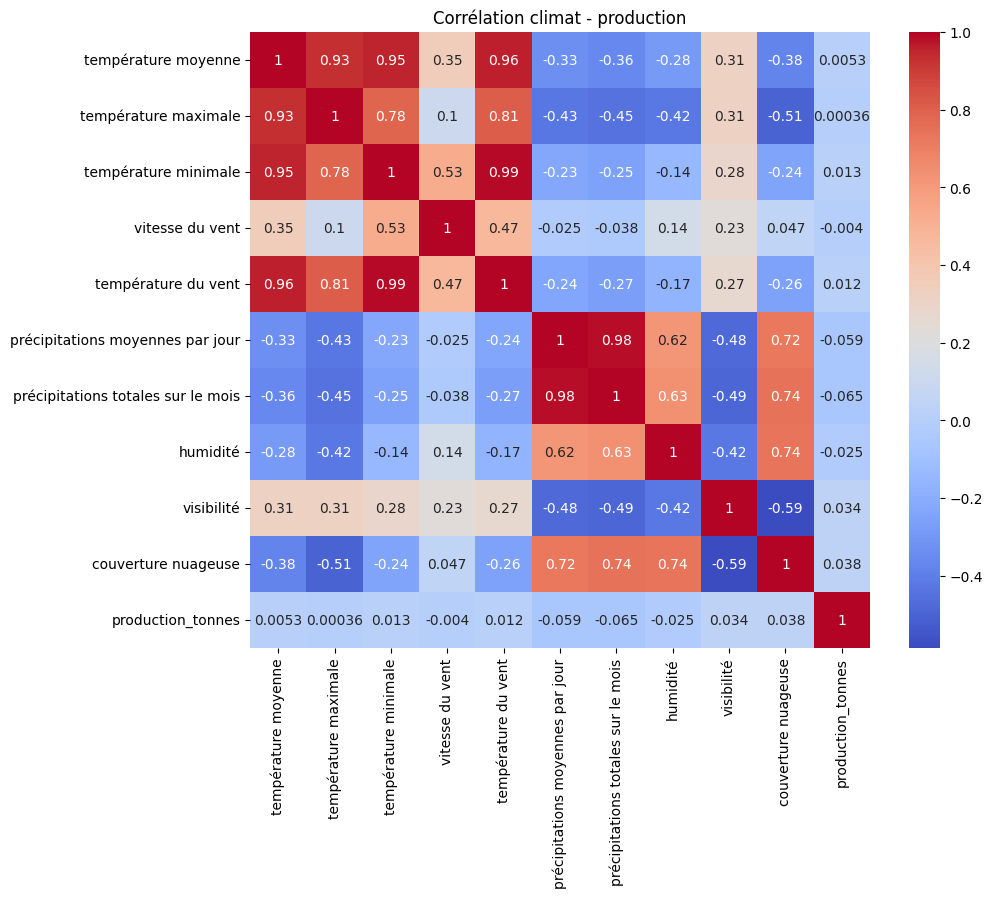

In [18]:
# Corrélation entre variables
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df[features + ["production_tonnes"]].corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation climat - production")
plt.show()


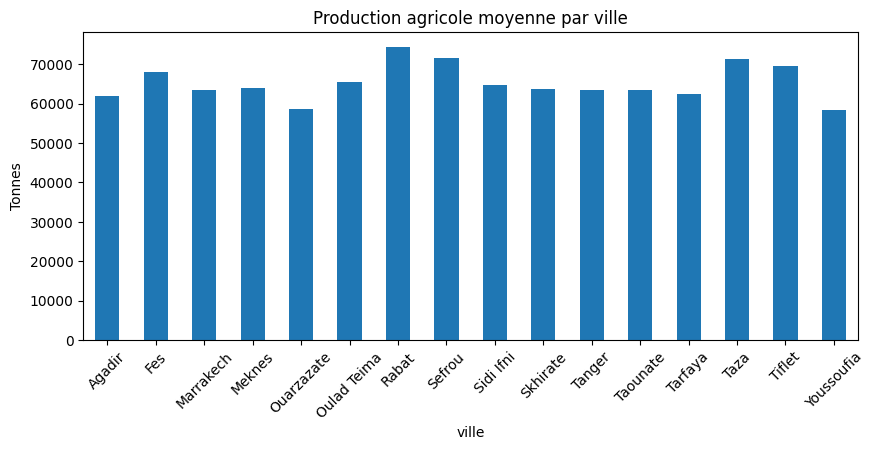

In [19]:
# Moyenne de production par ville
df.groupby("ville")["production_tonnes"].mean().plot(kind='bar', figsize=(10, 4))
plt.title("Production agricole moyenne par ville")
plt.ylabel("Tonnes")
plt.xticks(rotation=45)
plt.show()
